# 单资产训练及下游预测任务

In [5]:
from ts2vec import TS2Vec
import datautils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 数据集加载

In [2]:
data, train_slice, valid_slice, test_slice, scaler, pred_lens, n_covariate_cols = datautils.load_forecast_parquet(r'datasets/Astock_daily_dataset.parquet.gzip')

D:\home\work\seafile_root\王彦龙\我的资料库\私人资料库\GitHub\ts2vec\datautils.py:133: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  dt.weekofyear.to_numpy(),


#### 模型加载

In [3]:
model = TS2Vec(
    input_dims=data.values.shape[2],
    device='cuda',
    output_dims=256,
    max_train_length=400,
    hidden_dims=64,
    depth=10,
    batch_size=60,
)

In [2]:
data = pd.read_parquet(r'datasets/Astock_daily_dataset.parquet.gzip')

In [13]:
data

open   high    low  close     volume  turnover_rate  \
date       code                                                              
2011-01-04 000001.SZ  15.82  16.18  15.65  16.02  17.395804       0.011555   
           000002.SZ   8.27   8.98   8.23   8.80  19.056284       0.019554   
           000005.SZ   3.68   3.79   3.66   3.75  16.225050       0.012179   
           000006.SZ   7.05   7.45   6.96   7.27  16.623503       0.022373   
           000009.SZ  16.78  17.21  16.56  16.94  16.655318       0.015952   
...                     ...    ...    ...    ...        ...            ...   
2022-04-01 688599.SH  58.30  61.37  58.13  59.90  16.740440       0.014480   
           688600.SH  14.55  14.55  14.24  14.30  12.860333       0.005766   
           688788.SH  77.01  77.07  74.52  75.96  13.055961       0.014095   
           688981.SH  45.88  46.02  45.31  45.71  16.295626       0.006383   
           689009.SH  43.79  44.15  42.71  43.39  13.813940       0.001962   

                      return_rate  
date       code                    
2011-01-04 000001.SZ     0.012642  
           000002.SZ     0.064087  
           000005.SZ     0.019022  
           000006.SZ     0.031206  
           000009.SZ     0.009535  
...                           ...  
2022-04-01 688599.SH     0.027444  
           688600.SH    -0.017182  
           688788.SH    -0.013635  
           688981.SH    -0.003705  
           689009.SH    -0.009135  

[8157488 rows x 7 columns]

In [14]:
data.loc[pd.IndexSlice[:,'000002.SZ'],:]

,,open,high,low,close,volume,turnover_rate,return_rate
date,code,,,,,,,
2011-01-04,000002.SZ,8.27,8.98,8.23,8.80,19.056284,0.019554,0.064087
2011-01-05,000002.SZ,8.77,8.98,8.63,8.83,18.648742,0.013009,0.006842
2011-01-06,000002.SZ,8.88,8.98,8.69,8.84,18.186583,0.008195,-0.004505
2011-01-07,000002.SZ,8.84,9.20,8.78,8.89,18.790322,0.014988,0.005656
2011-01-10,000002.SZ,9.00,9.20,8.68,8.74,18.675685,0.013364,-0.028889
...,...,...,...,...,...,...,...,...
2022-03-28,000002.SZ,17.10,17.91,17.01,17.77,18.461905,0.010724,0.039181
2022-03-29,000002.SZ,17.63,17.84,17.39,17.48,17.998739,0.006748,-0.008508
2022-03-30,000002.SZ,17.55,19.05,17.47,18.98,19.206892,0.022589,0.081481


(array([6.824886e+06, 9.852130e+05, 1.990720e+05, 6.474300e+04,
        2.829200e+04, 1.590600e+04, 1.076800e+04, 6.886000e+03,
        4.897000e+03, 3.431000e+03, 2.528000e+03, 1.960000e+03,
        1.255000e+03, 1.013000e+03, 9.410000e+02, 8.300000e+02,
        5.960000e+02, 5.630000e+02, 4.750000e+02, 3.130000e+02,
        2.830000e+02, 2.640000e+02, 2.530000e+02, 2.150000e+02,
        2.010000e+02, 1.780000e+02, 1.390000e+02, 1.180000e+02,
        1.070000e+02, 6.800000e+01, 6.900000e+01, 3.500000e+01,
        2.900000e+01, 3.600000e+01, 3.900000e+01, 2.200000e+01,
        2.200000e+01, 3.500000e+01, 2.400000e+01, 1.700000e+01,
        1.800000e+01, 3.400000e+01, 3.400000e+01, 3.400000e+01,
        4.700000e+01, 3.700000e+01, 2.700000e+01, 2.300000e+01,
        1.600000e+01, 1.300000e+01, 5.000000e+00, 1.500000e+01,
        7.000000e+00, 4.000000e+00, 1.200000e+01, 7.000000e+00,
        4.000000e+00, 3.000000e+00, 0.000000e+00, 3.000000e+00,
        3.000000e+00, 4.000000e+00, 1.60

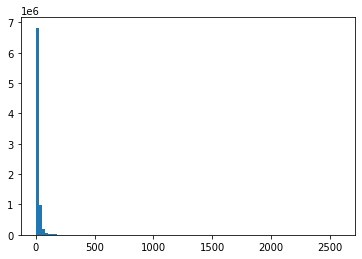

In [19]:
plt.hist(data.loc[:,'open'],bins=100)

(array([8.00000e+00, 3.90000e+01, 3.60000e+01, 1.10000e+01, 2.60000e+01,
        5.10000e+01, 2.80000e+01, 9.00000e+00, 1.40000e+01, 2.90000e+01,
        9.00000e+00, 1.10000e+01, 3.00000e+01, 1.20000e+01, 1.00000e+01,
        6.00000e+01, 1.56000e+02, 1.70000e+02, 3.67000e+02, 6.37000e+02,
        1.21600e+03, 1.90600e+03, 3.37700e+03, 5.31300e+03, 8.72800e+03,
        1.26300e+04, 2.27180e+04, 3.02520e+04, 4.08830e+04, 6.54600e+04,
        8.95470e+04, 1.13132e+05, 1.43657e+05, 1.87646e+05, 1.98825e+05,
        2.41215e+05, 2.79316e+05, 3.20935e+05, 3.34978e+05, 3.74927e+05,
        3.92961e+05, 3.96582e+05, 3.83563e+05, 3.90679e+05, 3.93785e+05,
        3.89588e+05, 3.93622e+05, 3.60560e+05, 3.34350e+05, 2.87049e+05,
        2.54240e+05, 2.44915e+05, 2.23791e+05, 1.93293e+05, 1.70816e+05,
        1.49350e+05, 1.34136e+05, 1.02559e+05, 8.68150e+04, 7.23840e+04,
        5.85320e+04, 4.87010e+04, 4.03950e+04, 3.34490e+04, 2.60140e+04,
        2.05020e+04, 1.57670e+04, 1.32120e+04, 1.12

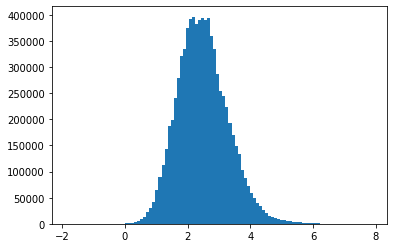

In [20]:
plt.hist(np.log(data).loc[:,'open'],bins=100)

#### 模型训练

In [4]:
data[train_slice]

<xarray.DataArray (code: 1640, date: 2734, factor: 14)>
array([[[ 0.        ,  0.        , -0.71971751, ...,  0.73018575,
         -0.36023069,  0.3946065 ],
        [ 0.        ,  0.        , -0.0086713 , ...,  0.62947346,
         -0.45817985, -0.20398849],
        [ 0.        ,  0.        ,  0.70237492, ...,  0.5954305 ,
         -0.48314336, -0.34202535],
        ...,
        [ 0.        ,  0.        , -0.0086713 , ...,  1.03202831,
         -0.49011108,  0.7929843 ],
        [ 0.        ,  0.        ,  0.70237492, ...,  1.01717867,
         -0.49953505,  0.61005601],
        [ 0.        ,  0.        ,  1.41342113, ...,  1.07662239,
         -0.45805454,  0.83571493]],

       [[ 0.        ,  0.        , -0.71971751, ...,  1.13523235,
         -0.1597457 ,  2.27294921],
        [ 0.        ,  0.        , -0.0086713 , ...,  1.03581931,
         -0.32378799,  0.18281188],
        [ 0.        ,  0.        ,  0.70237492, ...,  0.9230832 ,
         -0.44444492, -0.23145116],
...
        [ 0.        ,  0.        , -0.0086713 , ...,  0.1579942 ,
         -0.18358134, -0.00354009],
        [ 0.        ,  0.        ,  0.70237492, ...,  0.18260605,
         -0.13408042,  0.57077673],
        [ 0.        ,  0.        ,  1.41342113, ...,  0.19458427,
         -0.10813943, -1.16863229]],

       [[ 0.        ,  0.        , -0.71971751, ..., -0.27056821,
          0.09349849,  0.34418505],
        [ 0.        ,  0.        , -0.0086713 , ..., -0.4460253 ,
         -0.28774631,  0.06351265],
        [ 0.        ,  0.        ,  0.70237492, ..., -0.39109806,
         -0.19631372, -0.54658186],
        ...,
        [ 0.        ,  0.        , -0.0086713 , ...,  0.68587961,
         -0.16731496, -1.21423005],
        [ 0.        ,  0.        ,  0.70237492, ...,  0.79572248,
          0.10713318,  1.17851816],
        [ 0.        ,  0.        ,  1.41342113, ...,  0.69442353,
         -0.15012122, -0.23570725]]])
Coordinates:
  * code     (code) object '000001.SZ' '000002.SZ' ... '300141.SZ' '300142.SZ'
  * date     (date) datetime64[ns] 2011-01-04 2011-01-05 ... 2022-04-01
  * factor   (factor) <U13 'dt_0' 'dt_1' ... 'turnover_rate' 'return_rate'

In [5]:
loss_log = model.fit(
    data[train_slice].values,
    n_epochs = 80,
    n_iters = pow(2,15),
    verbose=True
)

Epoch #0: loss=2.6739231311693423
Epoch #1: loss=1.234305723047838
Epoch #2: loss=0.9108162384207655
Epoch #3: loss=0.6698574881728102
Epoch #4: loss=0.6365546443295188
Epoch #5: loss=0.575949779007493
Epoch #6: loss=0.5548665974198318
Epoch #7: loss=0.5282718126730221
Epoch #8: loss=0.5156168155372143
Epoch #9: loss=0.5694593279281768
Epoch #10: loss=0.5249642883313865
Epoch #11: loss=0.4969686204794703
Epoch #12: loss=0.48471990890982675
Epoch #13: loss=0.48774331562766216
Epoch #14: loss=0.4892467273535525
Epoch #15: loss=0.477029652493756
Epoch #16: loss=0.48369643405625007
Epoch #17: loss=0.4898360237115767
Epoch #18: loss=0.4736228904618723
Epoch #19: loss=0.4767411921809359
Epoch #20: loss=0.47844403877672625
Epoch #21: loss=0.4821335408927464
Epoch #22: loss=0.4950473501642303
Epoch #23: loss=0.4868140038920612
Epoch #24: loss=0.46956066232992383
Epoch #25: loss=0.47354752936105177
Epoch #26: loss=0.4567317778199184
Epoch #27: loss=0.4549958506917081
Epoch #28: loss=0.459405453

#### 打印损失图

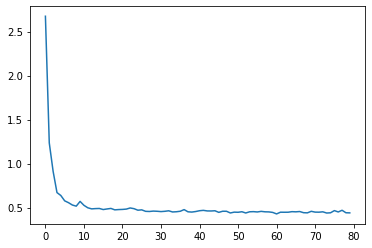

In [6]:
import matplotlib.pyplot as plt
plt.plot(loss_log)
plt.show()

#### 模型保存

In [7]:
model.save(r'examination/multi_stocks_dataset_ratio_dep10_80ep')